# Final Project

## Importing Essential Datasets

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

!pip install nfl_data_py
import nfl_data_py as nfl

## Loading in Datasets

In [3]:
# Import player information
players = nfl.import_players()

# Import all seasonal player stats (1999–present)
stats = nfl.import_seasonal_data([year for year in range(1999, 2025)])

In [4]:
players

,gsis_id,display_name,common_first_name,first_name,last_name,short_name,football_name,suffix,esb_id,nfl_id,...,status,ngs_status,ngs_status_short_description,years_of_experience,pff_position,pff_status,draft_year,draft_round,draft_pick,draft_team
0,00-0028830,Isaako Aaitui,Isaako,Isaako,Aaitui,None,None,None,AAI622937,None,...,DEV,None,None,2,DI,None,NaN,NaN,NaN,None
1,00-0038389,Israel Abanikanda,Israel,Israel,Abanikanda,I.Abanikanda,Israel,None,ABA159567,56008,...,DEV,DEV,Practice Squad,3,HB,A,2023.0,5.0,143.0,NYJ
2,00-0024644,Jon Abbate,Jon,Jon,Abbate,None,None,None,ABB051371,None,...,RES,None,None,0,None,None,NaN,NaN,NaN,None
3,ABB498348,Vince Abbott,Vince,Vincent,Abbott,None,None,None,ABB498348,None,...,ACT,None,None,2,None,None,NaN,NaN,NaN,None
4,00-0031021,Jared Abbrederis,Jared,Jared,Abbrederis,J.Abbrederis,Jared,None,ABB650964,41405,...,CUT,CUT,None,4,WR,None,2014.0,5.0,176.0,GB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24336,00-0034508,Gerhard de Beer,Gerhard,Gerhard,de Beer,G.de Beer,Gerhard,None,DEB150981,46692,...,DEV,CUT,None,0,None,None,NaN,NaN,NaN,None
24337,DEB622935,Case deBruijn,Case,Case,deBruijn,None,None,None,DEB622935,None,...,ACT,None,None,0,None,None,1982.0,8.0,214.0,KC
24338,VAN516304,Mark van Eeghen,Mark,Mark,van Eeghen,None,None,None,VAN516304,None,...,ACT,None,None,10,None,None,1974.0,3.0,75.0,LV
24339,00-0016956,Kimo von Oelhoffen,Kimo,Kimo,von Oelhoffen,None,None,None,VON221488,None,...,ACT,None,None,14,None,None,1994.0,6.0,162.0,CIN


https://www.kaggle.com/datasets/ulrikthygepedersen/nfl-combine-results?resource=download

In [5]:
combine = pd.read_csv('/content/nfl_combine.csv')

combine.head()

,year,name,college,pos,height_in,weight_lbs,hand_size_in,arm_length_in,wonderlic,40_yard,bench_press,vert_leap_in,broad_jump_in,shuttle,3cone,60yd_shuttle
0,2018,Josh Adams,Notre Dame,RB,74.0,213,9.25,33.75,NaN,NaN,18.0,NaN,NaN,NaN,NaN,NaN
1,2018,Ola Adeniyi,Toledo,DE,74.0,248,9.63,31.75,NaN,4.83,26.0,31.5,NaN,4.28,7.21,12.79
2,2018,Jordan Akins,Central Florida,TE,75.0,249,9.50,32.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018,Jaire Alexander,Louisville,CB,71.0,192,NaN,NaN,NaN,4.38,14.0,35.0,127.0,3.98,6.71,NaN
4,2018,Austin Allen,Arkansas,QB,72.0,210,9.63,30.63,NaN,4.81,NaN,29.5,112.0,4.48,7.18,NaN


In [6]:
players_subset = players[['display_name', 'years_of_experience']]
combine_players_merged = pd.merge(combine, players_subset, left_on='name', right_on='display_name', how='left')

# Drop the redundant 'display_name' column from players_subset after merge
combine_players_merged = combine_players_merged.drop(columns=['display_name'])

combine_players_merged

,year,name,college,pos,height_in,weight_lbs,hand_size_in,arm_length_in,wonderlic,40_yard,bench_press,vert_leap_in,broad_jump_in,shuttle,3cone,60yd_shuttle,years_of_experience
0,2018,Josh Adams,Notre Dame,RB,74.0,213,9.25,33.75,NaN,NaN,18.0,NaN,NaN,NaN,NaN,NaN,4.0
1,2018,Ola Adeniyi,Toledo,DE,74.0,248,9.63,31.75,NaN,4.83,26.0,31.5,NaN,4.28,7.21,12.79,5.0
2,2018,Jordan Akins,Central Florida,TE,75.0,249,9.50,32.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0
3,2018,Jaire Alexander,Louisville,CB,71.0,192,NaN,NaN,NaN,4.38,14.0,35.0,127.0,3.98,6.71,NaN,8.0
4,2018,Austin Allen,Arkansas,QB,72.0,210,9.63,30.63,NaN,4.81,NaN,29.5,112.0,4.48,7.18,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11385,1987,Rod Woodson,Purdue,CB,72.0,202,10.50,31.00,NaN,4.33,10.0,36.0,125.0,3.98,NaN,10.92,16.0
11386,1987,John Wooldridge,Ohio State,RB,68.4,193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11387,1987,David Wyman,Stanford,ILB,74.0,235,9.50,31.25,NaN,4.79,23.0,29.0,118.0,4.30,NaN,11.78,9.0
11388,1987,Theo Young,Arkansas,TE,74.0,231,9.00,34.00,NaN,4.89,9.0,30.0,107.0,4.20,NaN,11.71,0.0


### Cleaning data

In [7]:
#NT should be DT
combine_players_merged.loc[combine_players_merged['pos'] == 'NT', 'pos'] = 'DT'

#DL should be DT
combine_players_merged.loc[combine_players_merged['pos'] == 'DL', 'pos'] = 'DT'

#grouping together OL, G, OG, and C to IOL (interior offensive line)
combine_players_merged.loc[combine_players_merged['pos'].isin(['OL', 'C', 'OG', 'G']), 'pos'] = 'IOL'

#DB should be CB
combine_players_merged.loc[combine_players_merged['pos'] == 'DB', 'pos'] = 'CB'

#LB should be ILB
combine_players_merged.loc[combine_players_merged['pos'] == 'LB', 'pos'] = 'ILB'

#consolidating SS and FS to S
combine_players_merged.loc[combine_players_merged['pos'].isin(['SS', 'FS']), 'pos'] = 'S'

#dropping K, LS, and P as specialists should not be considered
combine_players_merged = combine_players_merged[~combine_players_merged['pos'].isin(['K', 'LS', 'P'])]

#dropping a player who was listed as being drafted in 5
combine_players_merged = combine_players_merged[combine_players_merged['year'] > 5]

combine_players_merged['pos'].value_counts()

,pos
WR,1579
CB,1180
RB,1067
IOL,1016
OLB,895
DE,889
S,870
OT,859
DT,854
TE,652


In [8]:
combine_players_merged.sort_values('year')

,year,name,college,pos,height_in,weight_lbs,hand_size_in,arm_length_in,wonderlic,40_yard,bench_press,vert_leap_in,broad_jump_in,shuttle,3cone,60yd_shuttle,years_of_experience
11389,1987,Jeff Zimmerman,Florida,IOL,75.4,341,9.00,33.50,NaN,5.36,22.0,22.5,NaN,4.83,NaN,NaN,3.0
11180,1987,Shawn Halloran,Boston College,QB,76.3,217,10.25,31.25,NaN,5.14,10.0,23.5,94.0,4.53,NaN,NaN,0.0
11181,1987,Tracy Ham,Georgia Southern,RB,70.3,196,9.25,30.00,NaN,4.74,6.0,28.0,110.0,4.28,NaN,11.80,NaN
11182,1987,James Hansen,Utah,OT,76.8,258,8.75,31.75,NaN,5.09,21.0,24.0,108.0,4.43,NaN,NaN,NaN
11183,1987,Jim Harbaugh,Michigan,QB,74.3,203,9.75,31.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,2018,Baker Mayfield,Oklahoma,QB,73.0,215,9.25,30.25,NaN,4.84,NaN,29.0,111.0,4.28,7.00,NaN,8.0
206,2018,Ray-Ray Mccloud,Clemson,WR,69.0,190,9.25,30.25,NaN,4.53,13.0,34.5,113.0,NaN,NaN,NaN,NaN
207,2018,Mike Mccray,Michigan,OLB,76.0,243,9.13,32.63,NaN,4.76,16.0,31.5,119.0,4.25,7.09,11.61,NaN
209,2018,Tarvarus Mcfadden,Florida State,CB,74.0,198,NaN,NaN,NaN,4.67,NaN,38.5,121.0,NaN,NaN,NaN,NaN


## Exploratory Data Analysis

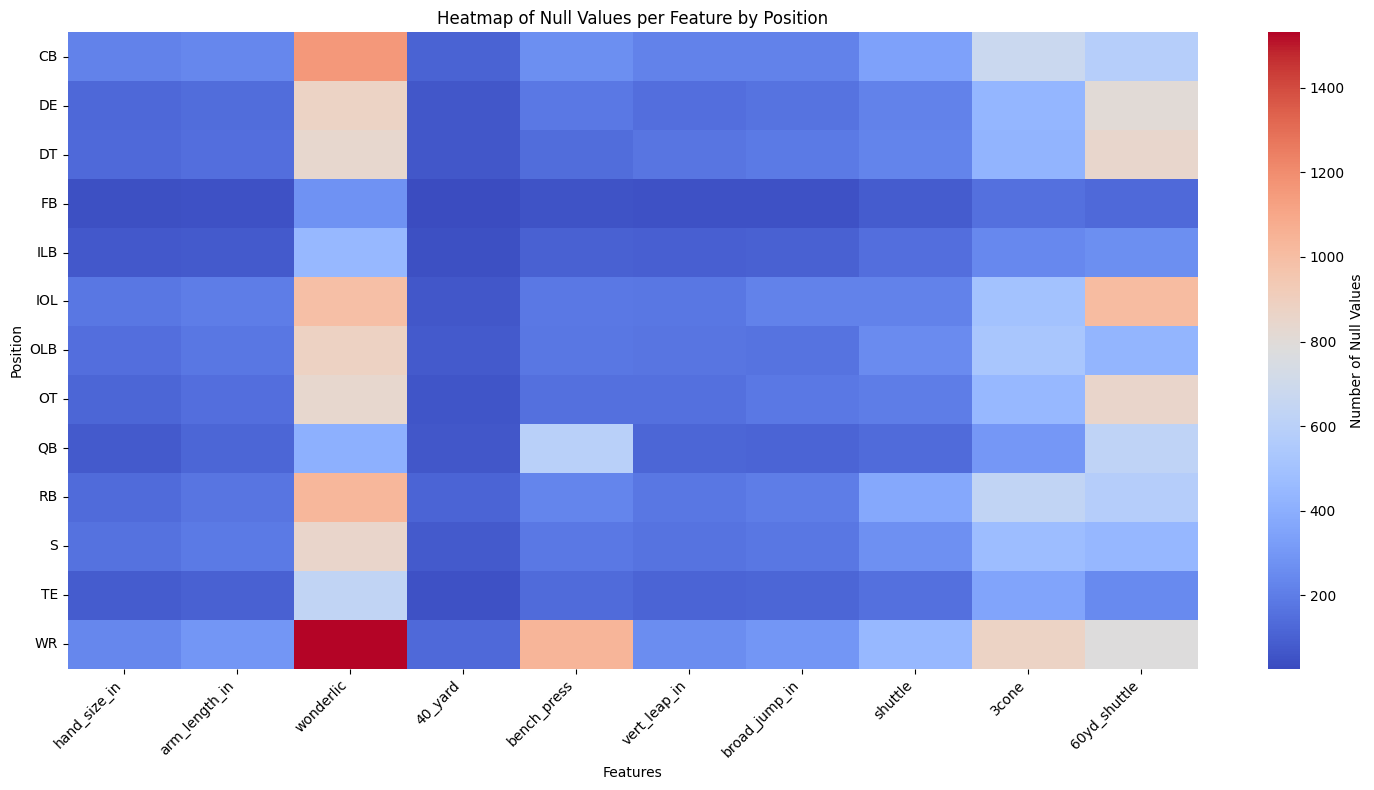

In [9]:
null_counts_by_pos = combine_players_merged.groupby('pos').apply(lambda x: x.isnull().sum())
null_counts_by_pos = null_counts_by_pos.drop(columns=['year', 'name', 'college', 'years_of_experience', 'pos', 'height_in', 'weight_lbs'])

plt.figure(figsize=(15, 8))
sns.heatmap(null_counts_by_pos, cmap='coolwarm', cbar_kws={'label': 'Number of Null Values'})
plt.title('Heatmap of Null Values per Feature by Position')
plt.xlabel('Features')
plt.ylabel('Position')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

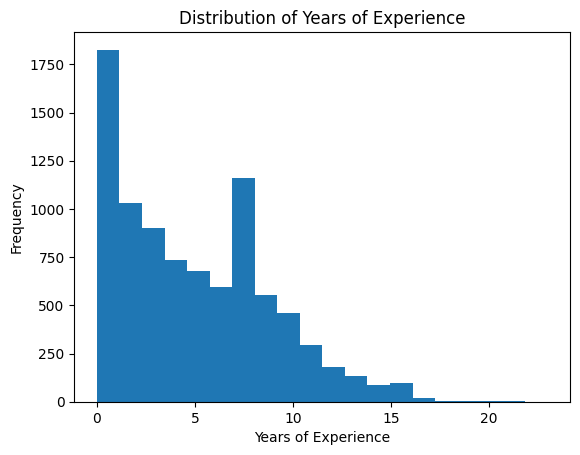

In [10]:
plt.hist(combine_players_merged['years_of_experience'], bins=20)
plt.xlabel('Years of Experience')
plt.ylabel('Frequency')
plt.title('Distribution of Years of Experience')
plt.show()

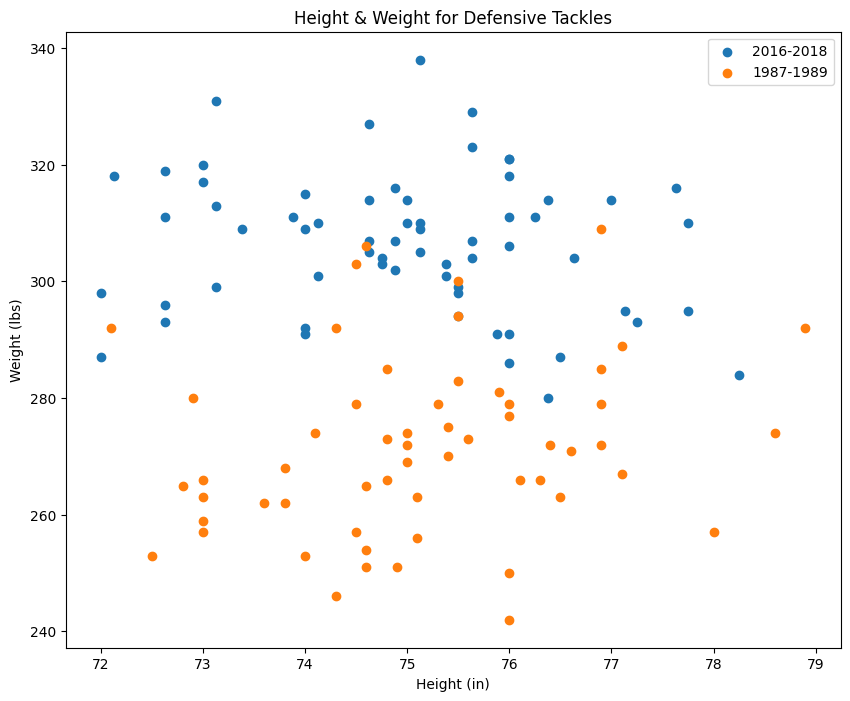

In [11]:
combine_2018 = combine[combine['year'].isin([2016, 2017, 2018])]
dt_2018 = combine_2018[combine_2018['pos'] == 'DT']
combine_1987 = combine[combine['year'].isin([1987, 1988, 1989])]
dt_1987 = combine_1987[combine_1987['pos'] == 'DT']

plt.figure(figsize=(10, 8))
plt.scatter(dt_2018['height_in'], dt_2018['weight_lbs'])
plt.scatter(dt_1987['height_in'], dt_1987['weight_lbs'])
plt.legend(['2016-2018', '1987-1989'])
plt.xlabel('Height (in)')
plt.ylabel('Weight (lbs)')
plt.title('Height & Weight for Defensive Tackles')
plt.show()

In [12]:
print(dt_2018['height_in'].mean())
print(dt_1987['height_in'].mean())

print(dt_2018['weight_lbs'].mean())
print(dt_1987['weight_lbs'].mean())

74.98906249999999
75.15614035087721
306.515625
271.5964912280702


## Creating Model Datasets

In [13]:
combine_players_merged['more_than_3_years_experience'] = (combine_players_merged['years_of_experience'] > 3).astype(int)
combine_players_merged.head()

,year,name,college,pos,height_in,weight_lbs,hand_size_in,arm_length_in,wonderlic,40_yard,bench_press,vert_leap_in,broad_jump_in,shuttle,3cone,60yd_shuttle,years_of_experience,more_than_3_years_experience
0,2018,Josh Adams,Notre Dame,RB,74.0,213,9.25,33.75,NaN,NaN,18.0,NaN,NaN,NaN,NaN,NaN,4.0,1
1,2018,Ola Adeniyi,Toledo,DE,74.0,248,9.63,31.75,NaN,4.83,26.0,31.5,NaN,4.28,7.21,12.79,5.0,1
2,2018,Jordan Akins,Central Florida,TE,75.0,249,9.50,32.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,1
3,2018,Jaire Alexander,Louisville,CB,71.0,192,NaN,NaN,NaN,4.38,14.0,35.0,127.0,3.98,6.71,NaN,8.0,1
4,2018,Austin Allen,Arkansas,QB,72.0,210,9.63,30.63,NaN,4.81,NaN,29.5,112.0,4.48,7.18,NaN,1.0,0


In [14]:
model_data = combine_players_merged.drop(columns=['name', 'college', 'years_of_experience'])
model_data.head()

,year,pos,height_in,weight_lbs,hand_size_in,arm_length_in,wonderlic,40_yard,bench_press,vert_leap_in,broad_jump_in,shuttle,3cone,60yd_shuttle,more_than_3_years_experience
0,2018,RB,74.0,213,9.25,33.75,NaN,NaN,18.0,NaN,NaN,NaN,NaN,NaN,1
1,2018,DE,74.0,248,9.63,31.75,NaN,4.83,26.0,31.5,NaN,4.28,7.21,12.79,1
2,2018,TE,75.0,249,9.50,32.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,2018,CB,71.0,192,NaN,NaN,NaN,4.38,14.0,35.0,127.0,3.98,6.71,NaN,1
4,2018,QB,72.0,210,9.63,30.63,NaN,4.81,NaN,29.5,112.0,4.48,7.18,NaN,0


In [15]:
model_data['more_than_3_years_experience'].value_counts()

,more_than_3_years_experience
0,6227
1,5007


## Models

### QB Models

In [16]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Filter for QBs
qb_data = model_data[model_data['pos'] == 'QB']

# Split by year
old_qb = qb_data[qb_data['year'] < 2004]
new_qb = qb_data[qb_data['year'] >= 2004]

# Define X/y
drop_cols = ['more_than_3_years_experience', 'pos', 'year']

old_X = old_qb.drop(columns=drop_cols)
new_X = new_qb.drop(columns=drop_cols)

old_y = old_qb['more_than_3_years_experience']
new_y = new_qb['more_than_3_years_experience']

# Train/test splits (stratifying to make sure samples have even distribution of years_experience)
old_X_train, old_X_test, old_y_train, old_y_test = train_test_split(old_X, old_y, test_size=0.3, random_state=42, stratify=old_y)

new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(new_X, new_y, test_size=0.3, random_state=42, stratify=new_y)

print(old_X_train.shape, old_y_train.shape, old_X_test.shape, old_y_test.shape)
print(new_X_train.shape, new_y_train.shape, new_X_test.shape, new_y_test.shape)

(222, 12) (222,) (96, 12) (96,)
(218, 12) (218,) (94, 12) (94,)


#### Pre-2004 QBs

In [17]:
from sklearn.metrics import classification_report

#old data
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(old_X_train, old_y_train)


print(classification_report(old_y_test, xgb_model.predict(old_X_test)))

              precision    recall  f1-score   support

           0       0.62      0.66      0.64        56
           1       0.47      0.42      0.45        40

    accuracy                           0.56        96
   macro avg       0.54      0.54      0.54        96
weighted avg       0.56      0.56      0.56        96



In [18]:
booster = xgb_model.get_booster()
importance = booster.get_score(importance_type='gain')
print(importance)


{'height_in': 0.6228826642036438, 'weight_lbs': 0.5422356724739075, 'hand_size_in': 0.8144818544387817, 'arm_length_in': 0.4755990505218506, 'wonderlic': 0.7853249311447144, '40_yard': 0.40919390320777893, 'vert_leap_in': 0.4030636250972748, 'broad_jump_in': 0.5790404081344604, 'shuttle': 0.572147786617279, '3cone': 0.5830509662628174}


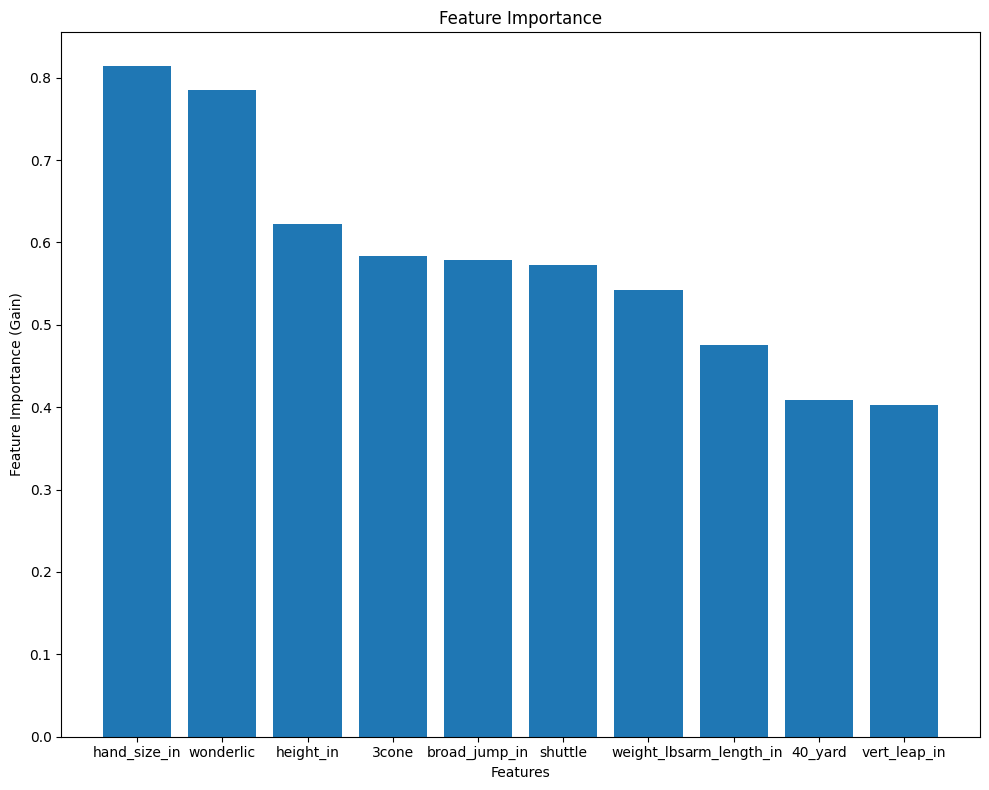

In [19]:
sorted_importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)
features = [item[0] for item in sorted_importance]
values = [item[1] for item in sorted_importance]

plt.figure(figsize=(10, 8))
plt.bar(features, values)
plt.ylabel('Feature Importance (Gain)')
plt.xlabel('Features')
plt.title('Feature Importance')
#plt.gca().invert_yaxis() # To display the most important feature at the top
plt.tight_layout()
plt.show()

#### Post-2004 QBs

In [20]:
#new data
xgb_model.fit(new_X_train, new_y_train)

print(classification_report(new_y_test, xgb_model.predict(new_X_test)))

              precision    recall  f1-score   support

           0       0.71      0.78      0.74        58
           1       0.58      0.50      0.54        36

    accuracy                           0.67        94
   macro avg       0.65      0.64      0.64        94
weighted avg       0.66      0.67      0.66        94



In [21]:
booster = xgb_model.get_booster()
importance = booster.get_score(importance_type='gain')
print(importance)

{'height_in': 0.6965559124946594, 'weight_lbs': 0.3470602035522461, 'hand_size_in': 0.44358253479003906, 'arm_length_in': 0.6531016826629639, 'wonderlic': 1.3990012407302856, '40_yard': 0.5196782350540161, 'vert_leap_in': 0.4602639675140381, 'broad_jump_in': 0.45585915446281433, 'shuttle': 0.38249316811561584, '3cone': 0.25862666964530945}


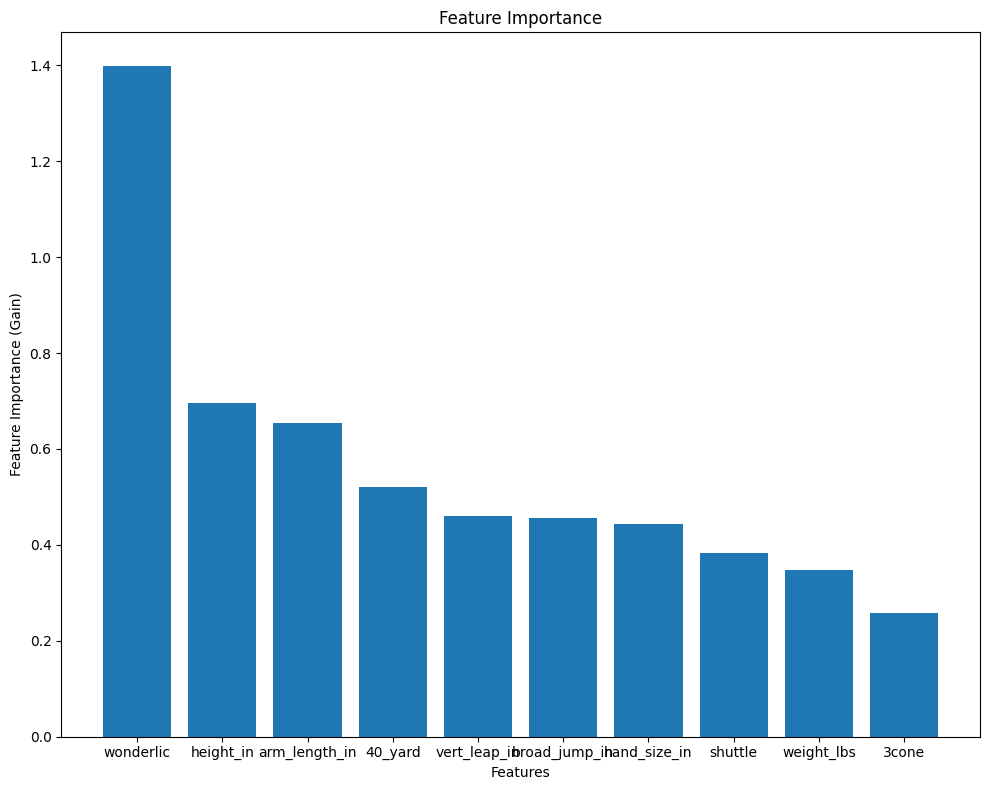

In [22]:
sorted_importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)
features = [item[0] for item in sorted_importance]
values = [item[1] for item in sorted_importance]

plt.figure(figsize=(10, 8))
plt.bar(features, values)
plt.ylabel('Feature Importance (Gain)')
plt.xlabel('Features')
plt.title('Feature Importance')
#plt.gca().invert_yaxis() # To display the most important feature at the top
plt.tight_layout()
plt.show()

### DT Models

In [23]:
# Filter for DTs
dt_data = model_data[model_data['pos'] == 'DT']

dt_data['wonderlic'].isnull().value_counts()

,wonderlic
True,839
False,15


Given that only 15 defensive tackles took the Wonderlic test, I will be removing it from the model to avoid skewing to those players.

In [24]:
# Split by year
old_dt = dt_data[dt_data['year'] < 2004]
new_dt = dt_data[dt_data['year'] >= 2004]

# Define X/y
drop_cols = ['more_than_3_years_experience', 'pos', 'year', 'wonderlic']

old_X = old_dt.drop(columns=drop_cols)
new_X = new_dt.drop(columns=drop_cols)

old_y = old_dt['more_than_3_years_experience']
new_y = new_dt['more_than_3_years_experience']

# Train/test splits (stratifying to make sure samples have even distribution of years_experience)
old_X_train, old_X_test, old_y_train, old_y_test = train_test_split(old_X, old_y, test_size=0.3, random_state=42, stratify=old_y)

new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(new_X, new_y, test_size=0.3, random_state=42, stratify=new_y)

print(old_X_train.shape, old_y_train.shape, old_X_test.shape, old_y_test.shape)
print(new_X_train.shape, new_y_train.shape, new_X_test.shape, new_y_test.shape)

(302, 11) (302,) (130, 11) (130,)
(295, 11) (295,) (127, 11) (127,)


In [58]:
print(old_dt['weight_lbs'].std())
print(new_dt['weight_lbs'].std())

18.925791750042798
15.826464505928532


#### Pre-2004 DTs

In [25]:
#old data
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(old_X_train, old_y_train)


print(classification_report(old_y_test, xgb_model.predict(old_X_test)))

              precision    recall  f1-score   support

           0       0.65      0.71      0.68        75
           1       0.55      0.49      0.52        55

    accuracy                           0.62       130
   macro avg       0.60      0.60      0.60       130
weighted avg       0.61      0.62      0.61       130



In [26]:
booster = xgb_model.get_booster()
importance = booster.get_score(importance_type='gain')
print(importance)

{'height_in': 0.40495169162750244, 'weight_lbs': 0.4477218687534332, 'hand_size_in': 0.3074510395526886, 'arm_length_in': 0.41781458258628845, '40_yard': 0.4447918236255646, 'bench_press': 0.4203827381134033, 'vert_leap_in': 0.6776090264320374, 'broad_jump_in': 0.5764585733413696, 'shuttle': 0.3555638790130615, '3cone': 0.43297526240348816}


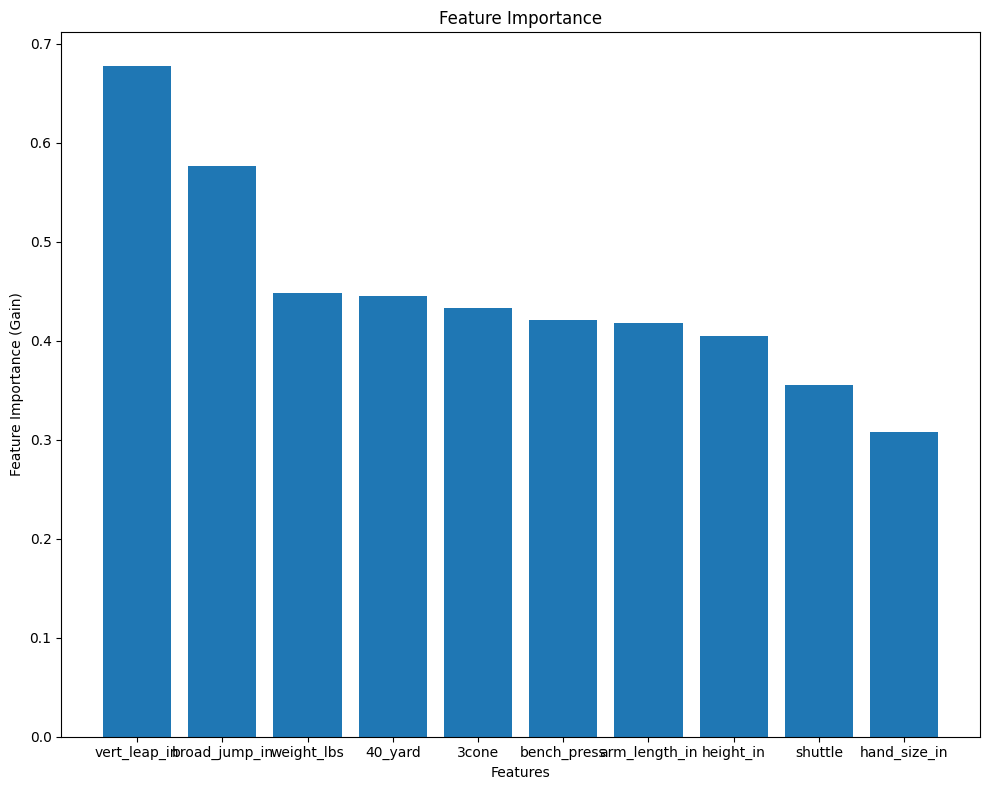

In [27]:
sorted_importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)
features = [item[0] for item in sorted_importance]
values = [item[1] for item in sorted_importance]

plt.figure(figsize=(10, 8))
plt.bar(features, values)
plt.ylabel('Feature Importance (Gain)')
plt.xlabel('Features')
plt.title('Feature Importance')
#plt.gca().invert_yaxis() # To display the most important feature at the top
plt.tight_layout()
plt.show()

#### Post-2004 DTs

In [28]:
#new data
xgb_model.fit(new_X_train, new_y_train)

print(classification_report(new_y_test, xgb_model.predict(new_X_test)))

              precision    recall  f1-score   support

           0       0.55      0.48      0.51        62
           1       0.56      0.62      0.58        65

    accuracy                           0.55       127
   macro avg       0.55      0.55      0.55       127
weighted avg       0.55      0.55      0.55       127



In [29]:
booster = xgb_model.get_booster()
importance = booster.get_score(importance_type='gain')
print(importance)

{'height_in': 0.38939040899276733, 'weight_lbs': 0.4728240966796875, 'hand_size_in': 0.6419604420661926, 'arm_length_in': 0.4212722182273865, '40_yard': 0.5398805141448975, 'bench_press': 0.4630732536315918, 'vert_leap_in': 0.4729330539703369, 'broad_jump_in': 0.3043643534183502, 'shuttle': 0.6889171600341797, '3cone': 0.50501549243927}


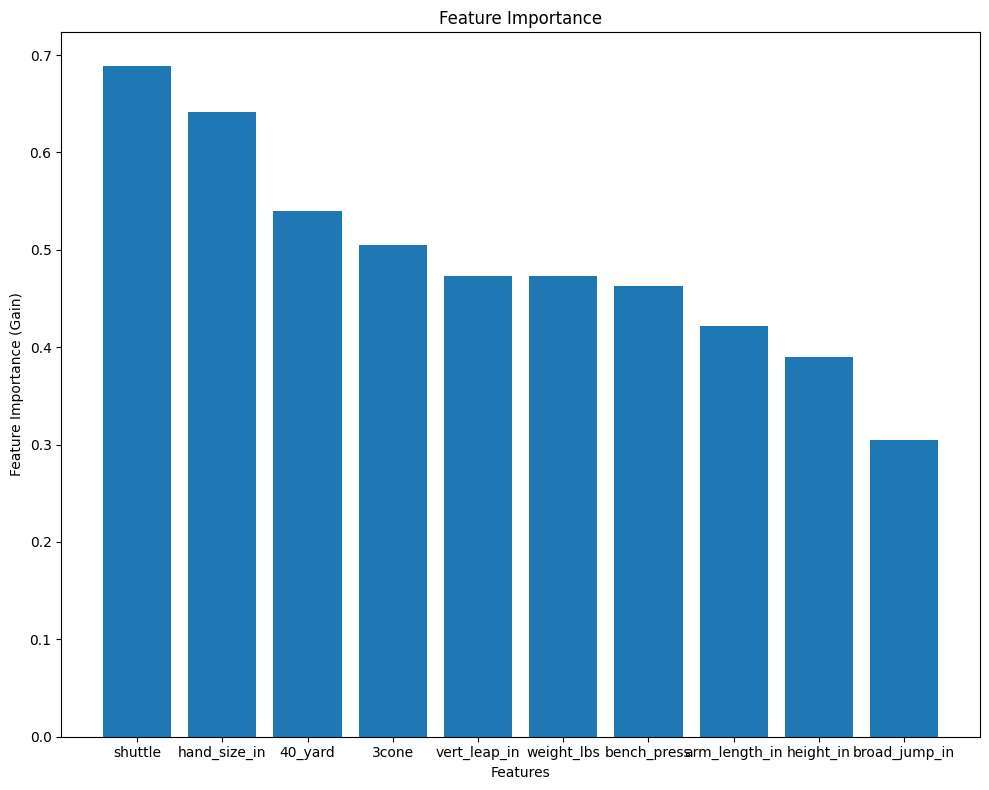

In [30]:
sorted_importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)
features = [item[0] for item in sorted_importance]
values = [item[1] for item in sorted_importance]

plt.figure(figsize=(10, 8))
plt.bar(features, values)
plt.ylabel('Feature Importance (Gain)')
plt.xlabel('Features')
plt.title('Feature Importance')
#plt.gca().invert_yaxis() # To display the most important feature at the top
plt.tight_layout()
plt.show()

### OT Models

In [31]:
# Filter for OTs
ot_data = model_data[model_data['pos'] == 'OT']

ot_data['wonderlic'].isnull().value_counts()

,wonderlic
True,840
False,19


In [32]:
# Split by year
old_ot = ot_data[ot_data['year'] < 2004]
new_ot = ot_data[ot_data['year'] >= 2004]

# Define X/y
drop_cols = ['more_than_3_years_experience', 'pos', 'year', 'wonderlic']

old_X = old_ot.drop(columns=drop_cols)
new_X = new_ot.drop(columns=drop_cols)

old_y = old_ot['more_than_3_years_experience']
new_y = new_ot['more_than_3_years_experience']

# Train/test splits (stratifying to make sure samples have even distribution of years_experience)
old_X_train, old_X_test, old_y_train, old_y_test = train_test_split(old_X, old_y, test_size=0.3, random_state=42, stratify=old_y)

new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(new_X, new_y, test_size=0.3, random_state=42, stratify=new_y)

print(old_X_train.shape, old_y_train.shape, old_X_test.shape, old_y_test.shape)
print(new_X_train.shape, new_y_train.shape, new_X_test.shape, new_y_test.shape)

(325, 11) (325,) (140, 11) (140,)
(275, 11) (275,) (119, 11) (119,)


#### Pre-2004 OTs

In [33]:
#old data
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(old_X_train, old_y_train)


print(classification_report(old_y_test, xgb_model.predict(old_X_test)))

              precision    recall  f1-score   support

           0       0.67      0.70      0.68        79
           1       0.59      0.56      0.57        61

    accuracy                           0.64       140
   macro avg       0.63      0.63      0.63       140
weighted avg       0.63      0.64      0.63       140



In [34]:
booster = xgb_model.get_booster()
importance = booster.get_score(importance_type='gain')
print(importance)

{'height_in': 0.6327208876609802, 'weight_lbs': 0.7423601746559143, 'hand_size_in': 0.40714231133461, 'arm_length_in': 0.3984578251838684, '40_yard': 0.6807527542114258, 'bench_press': 0.5600131154060364, 'vert_leap_in': 0.5262270569801331, 'broad_jump_in': 0.5643976330757141, 'shuttle': 0.587732195854187, '3cone': 0.8312566876411438}


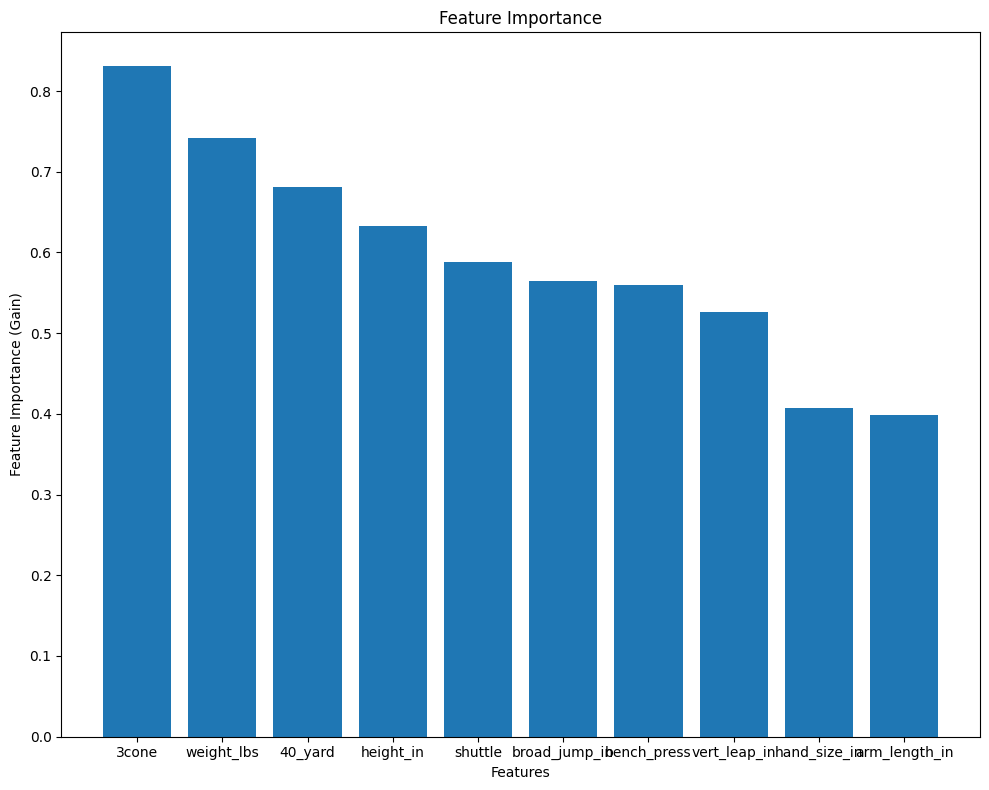

In [35]:
sorted_importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)
features = [item[0] for item in sorted_importance]
values = [item[1] for item in sorted_importance]

plt.figure(figsize=(10, 8))
plt.bar(features, values)
plt.ylabel('Feature Importance (Gain)')
plt.xlabel('Features')
plt.title('Feature Importance')
#plt.gca().invert_yaxis() # To display the most important feature at the top
plt.tight_layout()
plt.show()

#### Post-2004 OTs

In [36]:
#new data
xgb_model.fit(new_X_train, new_y_train)

print(classification_report(new_y_test, xgb_model.predict(new_X_test)))

              precision    recall  f1-score   support

           0       0.47      0.46      0.47        56
           1       0.53      0.54      0.54        63

    accuracy                           0.50       119
   macro avg       0.50      0.50      0.50       119
weighted avg       0.50      0.50      0.50       119



In [37]:
booster = xgb_model.get_booster()
importance = booster.get_score(importance_type='gain')
print(importance)

{'height_in': 0.6885741949081421, 'weight_lbs': 0.5458057522773743, 'hand_size_in': 0.8745681643486023, 'arm_length_in': 0.7428443431854248, '40_yard': 0.46030279994010925, 'bench_press': 0.3985562026500702, 'vert_leap_in': 0.5169583559036255, 'broad_jump_in': 0.41945281624794006, 'shuttle': 0.527193546295166, '3cone': 0.7528078556060791}


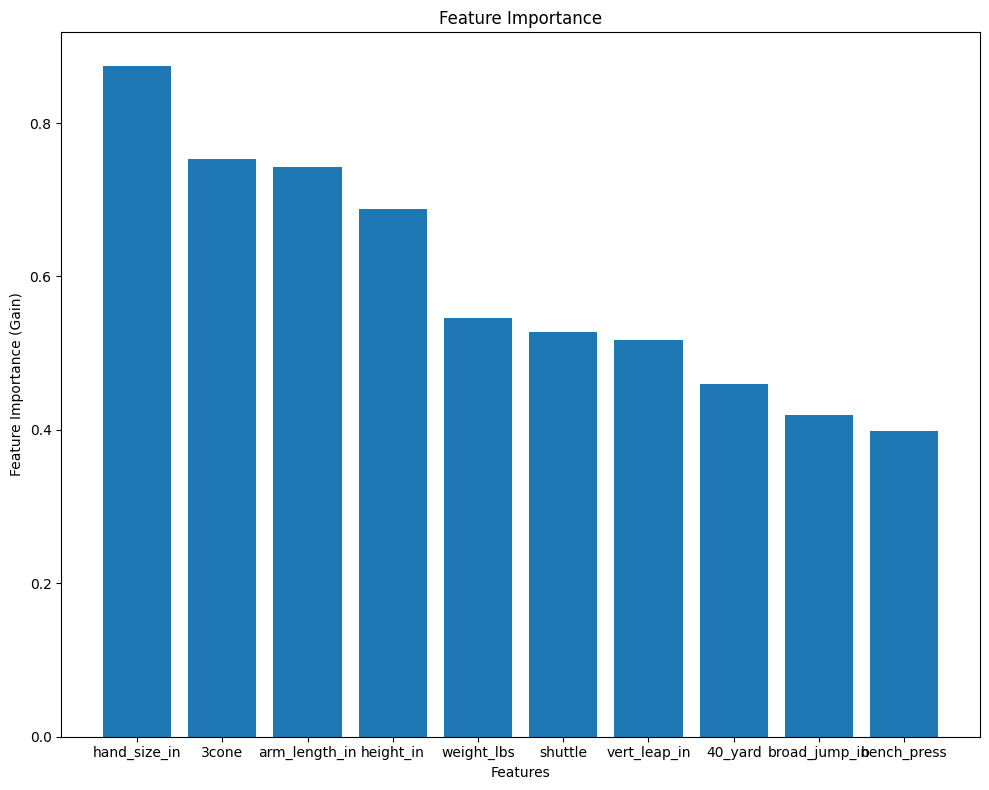

In [38]:
sorted_importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)
features = [item[0] for item in sorted_importance]
values = [item[1] for item in sorted_importance]

plt.figure(figsize=(10, 8))
plt.bar(features, values)
plt.ylabel('Feature Importance (Gain)')
plt.xlabel('Features')
plt.title('Feature Importance')
#plt.gca().invert_yaxis() # To display the most important feature at the top
plt.tight_layout()
plt.show()

### WR Models

In [39]:
# Filter for WRs
wr_data = model_data[model_data['pos'] == 'WR']

wr_data['wonderlic'].isnull().value_counts()

,wonderlic
True,1531
False,48


In [40]:
# Split by year
old_wr = wr_data[wr_data['year'] < 2004]
new_wr = wr_data[wr_data['year'] >= 2004]

# Define X/y
drop_cols = ['more_than_3_years_experience', 'pos', 'year', 'wonderlic']

old_X = old_wr.drop(columns=drop_cols)
new_X = new_wr.drop(columns=drop_cols)

old_y = old_wr['more_than_3_years_experience']
new_y = new_wr['more_than_3_years_experience']

# Train/test splits (stratifying to make sure samples have even distribution of years_experience)
old_X_train, old_X_test, old_y_train, old_y_test = train_test_split(old_X, old_y, test_size=0.3, random_state=42, stratify=old_y)

new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(new_X, new_y, test_size=0.3, random_state=42, stratify=new_y)

print(old_X_train.shape, old_y_train.shape, old_X_test.shape, old_y_test.shape)
print(new_X_train.shape, new_y_train.shape, new_X_test.shape, new_y_test.shape)

(567, 11) (567,) (243, 11) (243,)
(538, 11) (538,) (231, 11) (231,)


#### Pre-2004 WRs

In [41]:
#old data
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(old_X_train, old_y_train)


print(classification_report(old_y_test, xgb_model.predict(old_X_test)))

              precision    recall  f1-score   support

           0       0.70      0.65      0.67       153
           1       0.47      0.53      0.50        90

    accuracy                           0.60       243
   macro avg       0.59      0.59      0.59       243
weighted avg       0.62      0.60      0.61       243



In [42]:
booster = xgb_model.get_booster()
importance = booster.get_score(importance_type='gain')
print(importance)

{'height_in': 0.5866285562515259, 'weight_lbs': 0.5547550916671753, 'hand_size_in': 0.5531928539276123, 'arm_length_in': 0.6331071257591248, '40_yard': 1.1074872016906738, 'bench_press': 0.6360308527946472, 'vert_leap_in': 0.5831000804901123, 'broad_jump_in': 0.6478438377380371, 'shuttle': 0.5811110734939575, '3cone': 0.7325223684310913, '60yd_shuttle': 0.5893213152885437}


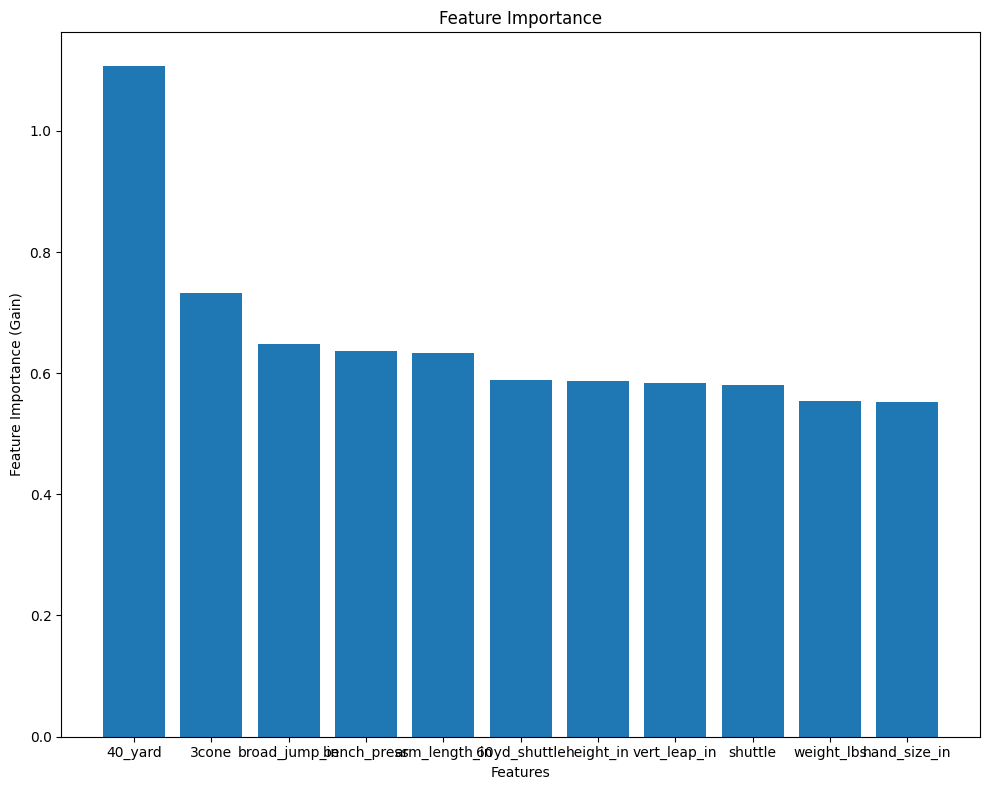

In [43]:
sorted_importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)
features = [item[0] for item in sorted_importance]
values = [item[1] for item in sorted_importance]

plt.figure(figsize=(10, 8))
plt.bar(features, values)
plt.ylabel('Feature Importance (Gain)')
plt.xlabel('Features')
plt.title('Feature Importance')
#plt.gca().invert_yaxis() # To display the most important feature at the top
plt.tight_layout()
plt.show()

#### Post-2004 WRs

In [44]:
#new data
xgb_model.fit(new_X_train, new_y_train)

print(classification_report(new_y_test, xgb_model.predict(new_X_test)))

              precision    recall  f1-score   support

           0       0.62      0.69      0.65       135
           1       0.49      0.42      0.45        96

    accuracy                           0.58       231
   macro avg       0.56      0.55      0.55       231
weighted avg       0.57      0.58      0.57       231



In [45]:
booster = xgb_model.get_booster()
importance = booster.get_score(importance_type='gain')
print(importance)

{'height_in': 0.6243011355400085, 'weight_lbs': 0.638003408908844, 'hand_size_in': 0.716185450553894, 'arm_length_in': 0.7039198279380798, '40_yard': 1.0177979469299316, 'bench_press': 0.5468926429748535, 'vert_leap_in': 0.597999095916748, 'broad_jump_in': 0.5242300629615784, 'shuttle': 0.6012556552886963, '3cone': 0.6286958456039429, '60yd_shuttle': 0.6858443021774292}


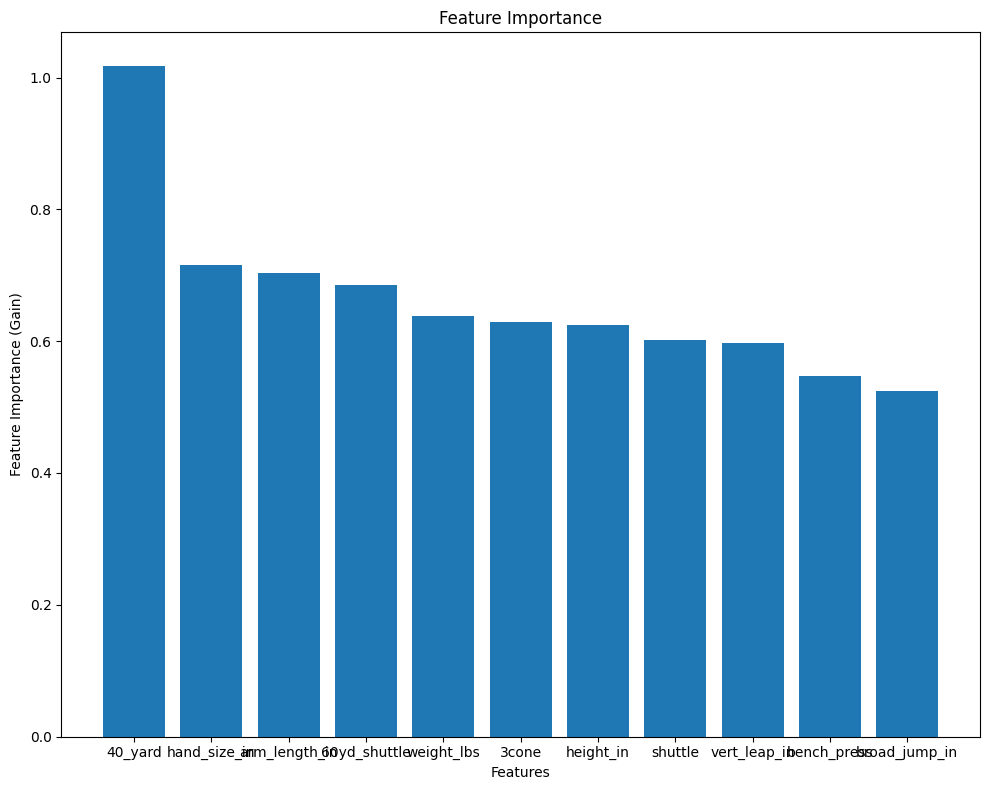

In [46]:
sorted_importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)
features = [item[0] for item in sorted_importance]
values = [item[1] for item in sorted_importance]

plt.figure(figsize=(10, 8))
plt.bar(features, values)
plt.ylabel('Feature Importance (Gain)')
plt.xlabel('Features')
plt.title('Feature Importance')
#plt.gca().invert_yaxis() # To display the most important feature at the top
plt.tight_layout()
plt.show()

### CB Models

In [47]:
cb_data = model_data[model_data['pos'] == 'CB']

cb_data['wonderlic'].isnull().value_counts()

,wonderlic
True,1157
False,23


In [48]:
# Split by year
old_cb = cb_data[cb_data['year'] < 2004]
new_cb = cb_data[cb_data['year'] >= 2004]

# Define X/y
drop_cols = ['more_than_3_years_experience', 'pos', 'year', 'wonderlic']

old_X = old_cb.drop(columns=drop_cols)
new_X = new_cb.drop(columns=drop_cols)

old_y = old_cb['more_than_3_years_experience']
new_y = new_cb['more_than_3_years_experience']

# Train/test splits (stratifying to make sure samples have even distribution of years_experience)
old_X_train, old_X_test, old_y_train, old_y_test = train_test_split(old_X, old_y, test_size=0.3, random_state=42, stratify=old_y)

new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(new_X, new_y, test_size=0.3, random_state=42, stratify=new_y)

print(old_X_train.shape, old_y_train.shape, old_X_test.shape, old_y_test.shape)
print(new_X_train.shape, new_y_train.shape, new_X_test.shape, new_y_test.shape)

(424, 11) (424,) (183, 11) (183,)
(401, 11) (401,) (172, 11) (172,)


#### Pre-2004 CBs

In [49]:
#old data
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(old_X_train, old_y_train)


print(classification_report(old_y_test, xgb_model.predict(old_X_test)))

              precision    recall  f1-score   support

           0       0.58      0.63      0.60       102
           1       0.48      0.43      0.45        81

    accuracy                           0.54       183
   macro avg       0.53      0.53      0.53       183
weighted avg       0.54      0.54      0.54       183



In [50]:
booster = xgb_model.get_booster()
importance = booster.get_score(importance_type='gain')
print(importance)

{'height_in': 0.5048356056213379, 'weight_lbs': 0.42372140288352966, 'hand_size_in': 0.5630607604980469, 'arm_length_in': 0.43749791383743286, '40_yard': 0.876833975315094, 'bench_press': 0.636882483959198, 'vert_leap_in': 0.6232837438583374, 'broad_jump_in': 0.6297490000724792, 'shuttle': 0.5816524028778076, '3cone': 0.9691125750541687, '60yd_shuttle': 0.5402068495750427}


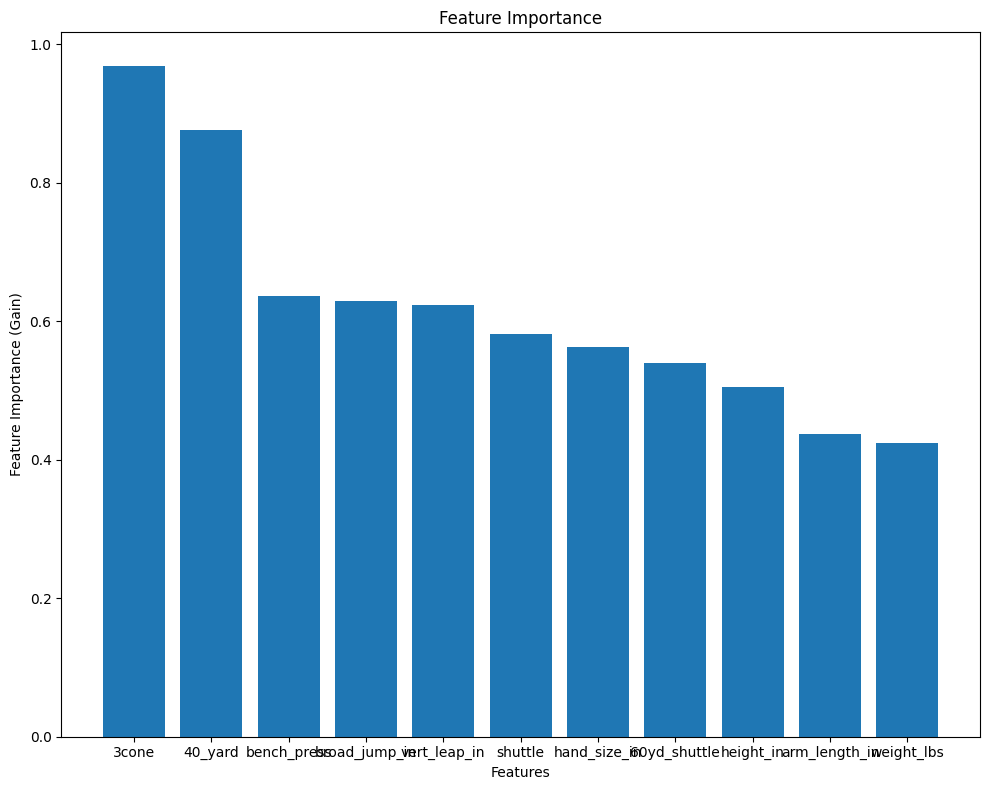

In [51]:
sorted_importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)
features = [item[0] for item in sorted_importance]
values = [item[1] for item in sorted_importance]

plt.figure(figsize=(10, 8))
plt.bar(features, values)
plt.ylabel('Feature Importance (Gain)')
plt.xlabel('Features')
plt.title('Feature Importance')
#plt.gca().invert_yaxis() # To display the most important feature at the top
plt.tight_layout()
plt.show()

#### Post-2004 CBs

In [52]:
#new data
xgb_model.fit(new_X_train, new_y_train)

print(classification_report(new_y_test, xgb_model.predict(new_X_test)))

              precision    recall  f1-score   support

           0       0.54      0.42      0.47        83
           1       0.55      0.66      0.60        89

    accuracy                           0.55       172
   macro avg       0.54      0.54      0.54       172
weighted avg       0.55      0.55      0.54       172



In [53]:
booster = xgb_model.get_booster()
importance = booster.get_score(importance_type='gain')
print(importance)

{'height_in': 0.5636546015739441, 'weight_lbs': 0.48436543345451355, 'hand_size_in': 0.5379773378372192, 'arm_length_in': 0.5605869293212891, '40_yard': 0.7161012291908264, 'bench_press': 0.5205485820770264, 'vert_leap_in': 0.5468266010284424, 'broad_jump_in': 0.6637890338897705, 'shuttle': 0.5035690665245056, '3cone': 0.4526631236076355, '60yd_shuttle': 0.512336790561676}


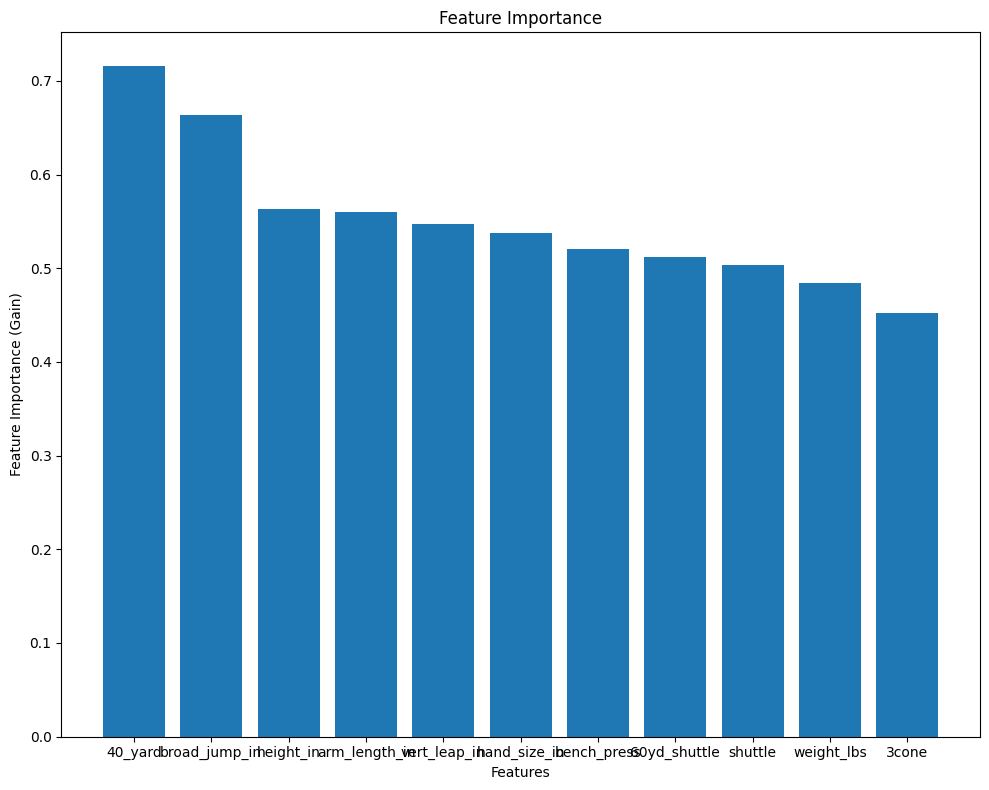

In [54]:
sorted_importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)
features = [item[0] for item in sorted_importance]
values = [item[1] for item in sorted_importance]

plt.figure(figsize=(10, 8))
plt.bar(features, values)
plt.ylabel('Feature Importance (Gain)')
plt.xlabel('Features')
plt.title('Feature Importance')
#plt.gca().invert_yaxis() # To display the most important feature at the top
plt.tight_layout()
plt.show()

###